In [9]:
# import statements

# maths and matrix comp
import pandas as pd
import numpy as np
import re

# plot
from scipy.stats import norm
import matplotlib.pyplot as plt

# custom functions
import HelperFunctionsForSongs



In [2]:
# read the data and understand it
df = pd.read_csv("songs7k.csv")
print("Number of songs in dataset" + " = "+ str(len(df)))
df.head(2)

Number of songs in dataset = 7363


,Unnamed: 0,Lyrics,Movie,Singer,SongName,Year
0,0,Ghoomar rabb waare\r\nAap padharo saa\r\n\r\nA...,Padmaavat,Shreya Ghoshal,Ghoomar,2018
1,1,Yo yo honey singh…\r\n\r\nHoye…\r\n\r\nSuno ka...,Sonu Ke Titu ki Sweety,"Yo Yo Honey Singh, Simar Kaur & Ishers",Dil Chori,2018


In [6]:
# get the compression for all the songs in the dataset
compressions = []
compressions = HelperFunctionsForSongs.getCompressionFromAllSongs(df,10)
len(compressions) 

10

In [7]:
# # save the compressions since the processing takes time.
# df["compressions"] = compressions
compressions

[64.73429951690821,
 65.98599766627771,
 65.08333333333333,
 66.45569620253164,
 62.76041666666667,
 59.33147632311977,
 62.20275344180226,
 69.50092421441775,
 63.40621403912543,
 65.75757575757575]

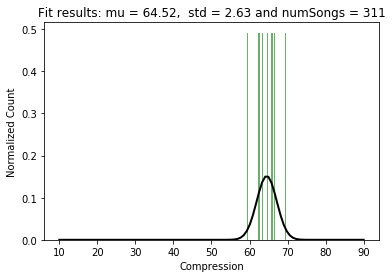

In [10]:
# ploting a normal curve for the distribution on songs


# Generate some data for this demonstration.
# data = norm.rvs(100.0, 25, size=500)
data= compressions
for x in range(len(data)):
    if(data[x]<=0):
        data[x] = -1*data[x]
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
plt.xticks([x for x in range(10, 100, 10)])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Compression")
plt.ylabel("Normalized Count")
title = "Fit results: mu = %.2f,  std = %.2f and numSongs = %0.0f" % (mu, std, len(compressions) + 301)
plt.title(title)
plt.show()